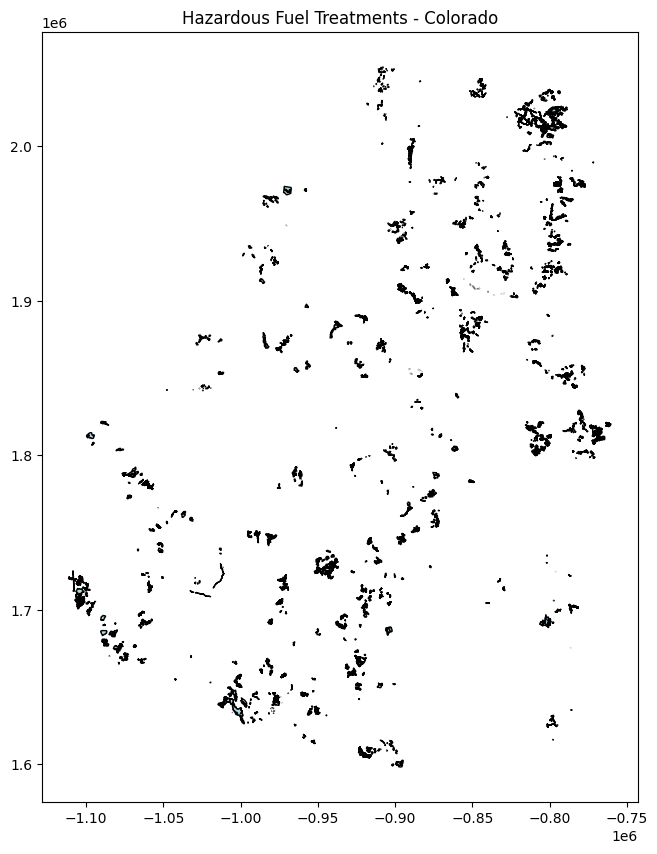

,SUID,ORG,ACTIVITY_C,ACTIVITY,LOCAL_QUAL,ASU_NBR_UN,ASU_UOM,ADMIN_REGI,ADMIN_FORE,ADMIN_DIST,...,UK_HAZ,CRC_HAZ,ETL_MODI_1,GIS_ACRES,PURPOSE_CO,ACT_CREATE,ACT_MODIFI,Shape_Leng,Shape_Area,geometry
0,020904DIRD000048120,020904,1120,Yarding - Removal of Fuels by Carrying or Drag...,N/A,113.0,ACRES,02,09,04,...,6620570010602_020904DIRD000048120,CE9A0926B1255854,2024-09-06,112.995,NaN,2022-09-20,2022-09-20,0.044798,0.000047,"POLYGON ((-923457.955 1668206.124, -923441.811..."
1,020904DIRD000048124,020904,1120,Yarding - Removal of Fuels by Carrying or Drag...,N/A,28.2,ACRES,02,09,04,...,6620716010602_020904DIRD000048124,748C72F0B6BBFB3B,2024-09-06,28.170,NaN,2022-09-20,2022-09-20,0.016679,0.000012,"POLYGON ((-922536.608 1666430.908, -922556.220..."
2,021211US0303F002011,021211,1130,Burning of Piled Material,N/A,31.0,ACRES,02,12,11,...,6035409010602_021211US0303F002011,C9FC63D4DA1ADE5D,2024-09-06,31.025,FTI,2020-03-16,2022-09-08,0.022340,0.000013,"POLYGON ((-809242.523 1860782.510, -809246.475..."
3,021211US0303F002011,021211,1130,Burning of Piled Material,N/A,31.0,ACRES,02,12,11,...,5973470010602_021211US0303F002011,C9FC63D43D9BE6C6,2024-09-06,31.025,FTI,2019-10-25,2022-09-08,0.022340,0.000013,"POLYGON ((-809242.523 1860782.510, -809246.475..."
4,021005CP0604001303A,021005,1130,Burning of Piled Material,N/A,21.0,ACRES,02,10,05,...,4375856010602_021005CP0604001303A,E54A27FDDF7AEB90,2024-09-06,20.582,FTM,2014-10-11,2022-09-08,0.023057,0.000009,"POLYGON ((-796533.483 2013871.818, -796533.479..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6285,021202AH0705F001011,021202,1111,Broadcast Burning - Covers a majority of the unit,N/A,4500.0,ACRES,02,12,02,...,6901044010602_021202AH0705F001011,9B41CDAC0818AF3F,2024-09-06,185.438,FTF,2023-10-24,2023-10-24,0.042194,0.000078,"POLYGON ((-874681.981 1776819.763, -874692.585..."
6286,021202AH0515F003002,021202,1111,Broadcast Burning - Covers a majority of the unit,N/A,6300.0,ACRES,02,12,02,...,6900982010602_021202AH0515F003002,2CDF4B39EAF8B704,2024-09-06,1080.288,FTM,2023-10-24,2023-10-24,0.135309,0.000453,"POLYGON ((-871464.754 1787106.512, -871522.050..."
6287,021210SH0401F020M12,021210,1160,Thinning for Hazardous Fuels Reduction,N/A,40.0,ACRES,02,12,10,...,6770186010602_021210SH0401F020M12,CC16D3A3729440C8,2024-09-06,39.534,FTI,2023-05-24,2023-05-24,0.044025,0.000017,"POLYGON ((-800444.407 1812118.270, -800442.159..."
6288,021209FC0202F007006,021209,1130,Burning of Piled Material,N/A,10.0,ACRES,02,12,09,...,6350570010602_021209FC0202F007006,D9F3A609007423C7,2024-09-06,10.461,NaN,2021-09-27,2022-09-08,0.018277,0.000004,"MULTIPOLYGON (((-768802.260 1813281.603, -7688..."


In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Path to the shapefile
shapefile_path = r"C:\Users\magst\Desktop\CHAPTER1_DataRerun\ColoradoHFT\HazFuelTrt_PL_CO_NEWCRS.shp"

# Read the shapefile using GeoPandas
gdf = gpd.read_file(shapefile_path)

# Plot the shapefile
gdf.plot(figsize=(10, 10), color='lightblue', edgecolor='black')

# Add plot title and display the plot
plt.title("Hazardous Fuel Treatments - Colorado")
plt.show()
gdf

In [7]:
# Yarding 1120

In [12]:
import geopandas as gpd
import rasterio
from rasterio.features import rasterize
import numpy as np

# Step 1: Load the shapefile
gdf = gpd.read_file(r"C:\Users\magst\Desktop\CHAPTER1_DataRerun\ColoradoHFT\HazFuelTrt_PL_CO_NEWCRS.shp")

# Step 2: Filter only valid geometries and by ACTIVITY_C == '1120'
#valid_gdf = gdf[gdf.is_valid]  # Filter valid geometries
#filtered_gdf = valid_gdf[valid_gdf['ACTIVITY_C'] == '1120']  # Filter by ACTIVITY_C
filtered_gdf = gdf[gdf['ACTIVITY_C'] == '1120']  # Filter by ACTIVITY_C

# Step 3: Ensure there are valid geometries after filtering
if filtered_gdf.empty or filtered_gdf.geometry.is_empty.all():
    raise ValueError("No valid geometries found in the filtered GeoDataFrame.")

# Step 4: Load the reference raster to match extent, resolution, and CRS
reference_raster_path = r"C:\Users\magst\Desktop\CHAPTER1_DataRerun\WRC2020\CO\BP_CO.tif"
with rasterio.open(reference_raster_path) as ref_src:
    transform = ref_src.transform  # Get the transform of the reference raster
    ncols, nrows = ref_src.width, ref_src.height  # Get the width and height
    crs = ref_src.crs  # Get the CRS
    out_meta = ref_src.meta.copy()  # Copy the reference raster's metadata

# Step 5: Rasterize the filtered GeoDataFrame using FY_PLANNED values
# Convert geometries and their FY_PLANNED values into a format that rasterize can use
shapes = ((geom, value) for geom, value in zip(filtered_gdf.geometry, filtered_gdf['FY_PLANNED']))

raster = rasterize(
    shapes,
    out_shape=(nrows, ncols),  # Match the shape of the reference raster
    transform=transform,  # Use the same transform as the reference raster
    fill=0,  # 0 where no polygon
    dtype='uint16'  # Use uint16 to store year values (FY_PLANNED)
)

# Step 6: Update metadata for the new raster, set nodata value to 65535
out_meta.update({
    'driver': 'GTiff',
    'height': nrows,
    'width': ncols,
    'transform': transform,
    'crs': crs,
    'dtype': 'uint16',  # Using uint16 to accommodate year values
    'nodata': 65535  # Valid nodata value for uint16
})

# Step 7: Save the raster to a file
output_raster_path = r"C:\Users\magst\Desktop\HFTRERUN\Activity_1120_30m_snapped_fy_planned.tif"
with rasterio.open(output_raster_path, 'w', **out_meta) as out_raster:
    out_raster.write(raster, 1)

print(f"Raster saved to: {output_raster_path}")


Raster saved to: C:\Users\magst\Desktop\HFTRERUN\Activity_1120_30m_snapped_fy_planned.tif


In [13]:
# Broadcast Burning

In [14]:
import geopandas as gpd
import rasterio
from rasterio.features import rasterize
import numpy as np

# Step 1: Load the shapefile
gdf = gpd.read_file(r"C:\Users\magst\Desktop\CHAPTER1_DataRerun\ColoradoHFT\HazFuelTrt_PL_CO_NEWCRS.shp")

# Step 2: Filter only valid geometries and by ACTIVITY_C == '1120'
#valid_gdf = gdf[gdf.is_valid]  # Filter valid geometries
#filtered_gdf = valid_gdf[valid_gdf['ACTIVITY_C'] == '1120']  # Filter by ACTIVITY_C
filtered_gdf = gdf[gdf['ACTIVITY_C'] == '1111']  # Filter by ACTIVITY_C

# Step 3: Ensure there are valid geometries after filtering
if filtered_gdf.empty or filtered_gdf.geometry.is_empty.all():
    raise ValueError("No valid geometries found in the filtered GeoDataFrame.")

# Step 4: Load the reference raster to match extent, resolution, and CRS
reference_raster_path = r"C:\Users\magst\Desktop\CHAPTER1_DataRerun\WRC2020\CO\BP_CO.tif"
with rasterio.open(reference_raster_path) as ref_src:
    transform = ref_src.transform  # Get the transform of the reference raster
    ncols, nrows = ref_src.width, ref_src.height  # Get the width and height
    crs = ref_src.crs  # Get the CRS
    out_meta = ref_src.meta.copy()  # Copy the reference raster's metadata

# Step 5: Rasterize the filtered GeoDataFrame using FY_PLANNED values
# Convert geometries and their FY_PLANNED values into a format that rasterize can use
shapes = ((geom, value) for geom, value in zip(filtered_gdf.geometry, filtered_gdf['FY_PLANNED']))

raster = rasterize(
    shapes,
    out_shape=(nrows, ncols),  # Match the shape of the reference raster
    transform=transform,  # Use the same transform as the reference raster
    fill=0,  # 0 where no polygon
    dtype='uint16'  # Use uint16 to store year values (FY_PLANNED)
)

# Step 6: Update metadata for the new raster, set nodata value to 65535
out_meta.update({
    'driver': 'GTiff',
    'height': nrows,
    'width': ncols,
    'transform': transform,
    'crs': crs,
    'dtype': 'uint16',  # Using uint16 to accommodate year values
    'nodata': 65535  # Valid nodata value for uint16
})

# Step 7: Save the raster to a file
output_raster_path = r"C:\Users\magst\Desktop\HFTRERUN\Activity_1111_30m_snapped_fy_planned.tif"
with rasterio.open(output_raster_path, 'w', **out_meta) as out_raster:
    out_raster.write(raster, 1)

print(f"Raster saved to: {output_raster_path}")


Raster saved to: C:\Users\magst\Desktop\HFTRERUN\Activity_1111_30m_snapped_fy_planned.tif


In [ ]:
# Thinning for hft

In [15]:
import geopandas as gpd
import rasterio
from rasterio.features import rasterize
import numpy as np

# Step 1: Load the shapefile
gdf = gpd.read_file(r"C:\Users\magst\Desktop\CHAPTER1_DataRerun\ColoradoHFT\HazFuelTrt_PL_CO_NEWCRS.shp")

# Step 2: Filter only valid geometries and by ACTIVITY_C == '1120'
#valid_gdf = gdf[gdf.is_valid]  # Filter valid geometries
#filtered_gdf = valid_gdf[valid_gdf['ACTIVITY_C'] == '1120']  # Filter by ACTIVITY_C
filtered_gdf = gdf[gdf['ACTIVITY_C'] == '1160']  # Filter by ACTIVITY_C

# Step 3: Ensure there are valid geometries after filtering
if filtered_gdf.empty or filtered_gdf.geometry.is_empty.all():
    raise ValueError("No valid geometries found in the filtered GeoDataFrame.")

# Step 4: Load the reference raster to match extent, resolution, and CRS
reference_raster_path = r"C:\Users\magst\Desktop\CHAPTER1_DataRerun\WRC2020\CO\BP_CO.tif"
with rasterio.open(reference_raster_path) as ref_src:
    transform = ref_src.transform  # Get the transform of the reference raster
    ncols, nrows = ref_src.width, ref_src.height  # Get the width and height
    crs = ref_src.crs  # Get the CRS
    out_meta = ref_src.meta.copy()  # Copy the reference raster's metadata

# Step 5: Rasterize the filtered GeoDataFrame using FY_PLANNED values
# Convert geometries and their FY_PLANNED values into a format that rasterize can use
shapes = ((geom, value) for geom, value in zip(filtered_gdf.geometry, filtered_gdf['FY_PLANNED']))

raster = rasterize(
    shapes,
    out_shape=(nrows, ncols),  # Match the shape of the reference raster
    transform=transform,  # Use the same transform as the reference raster
    fill=0,  # 0 where no polygon
    dtype='uint16'  # Use uint16 to store year values (FY_PLANNED)
)

# Step 6: Update metadata for the new raster, set nodata value to 65535
out_meta.update({
    'driver': 'GTiff',
    'height': nrows,
    'width': ncols,
    'transform': transform,
    'crs': crs,
    'dtype': 'uint16',  # Using uint16 to accommodate year values
    'nodata': 65535  # Valid nodata value for uint16
})

# Step 7: Save the raster to a file
output_raster_path = r"C:\Users\magst\Desktop\HFTRERUN\Activity_1160_30m_snapped_fy_planned.tif"
with rasterio.open(output_raster_path, 'w', **out_meta) as out_raster:
    out_raster.write(raster, 1)

print(f"Raster saved to: {output_raster_path}")


Raster saved to: C:\Users\magst\Desktop\HFTRERUN\Activity_1160_30m_snapped_fy_planned.tif


In [ ]:
# Burning of Piled Material

In [16]:
import geopandas as gpd
import rasterio
from rasterio.features import rasterize
import numpy as np

# Step 1: Load the shapefile
gdf = gpd.read_file(r"C:\Users\magst\Desktop\CHAPTER1_DataRerun\ColoradoHFT\HazFuelTrt_PL_CO_NEWCRS.shp")

# Step 2: Filter only valid geometries and by ACTIVITY_C == '1120'
#valid_gdf = gdf[gdf.is_valid]  # Filter valid geometries
#filtered_gdf = valid_gdf[valid_gdf['ACTIVITY_C'] == '1120']  # Filter by ACTIVITY_C
filtered_gdf = gdf[gdf['ACTIVITY_C'] == '1130']  # Filter by ACTIVITY_C

# Step 3: Ensure there are valid geometries after filtering
if filtered_gdf.empty or filtered_gdf.geometry.is_empty.all():
    raise ValueError("No valid geometries found in the filtered GeoDataFrame.")

# Step 4: Load the reference raster to match extent, resolution, and CRS
reference_raster_path = r"C:\Users\magst\Desktop\CHAPTER1_DataRerun\WRC2020\CO\BP_CO.tif"
with rasterio.open(reference_raster_path) as ref_src:
    transform = ref_src.transform  # Get the transform of the reference raster
    ncols, nrows = ref_src.width, ref_src.height  # Get the width and height
    crs = ref_src.crs  # Get the CRS
    out_meta = ref_src.meta.copy()  # Copy the reference raster's metadata

# Step 5: Rasterize the filtered GeoDataFrame using FY_PLANNED values
# Convert geometries and their FY_PLANNED values into a format that rasterize can use
shapes = ((geom, value) for geom, value in zip(filtered_gdf.geometry, filtered_gdf['FY_PLANNED']))

raster = rasterize(
    shapes,
    out_shape=(nrows, ncols),  # Match the shape of the reference raster
    transform=transform,  # Use the same transform as the reference raster
    fill=0,  # 0 where no polygon
    dtype='uint16'  # Use uint16 to store year values (FY_PLANNED)
)

# Step 6: Update metadata for the new raster, set nodata value to 65535
out_meta.update({
    'driver': 'GTiff',
    'height': nrows,
    'width': ncols,
    'transform': transform,
    'crs': crs,
    'dtype': 'uint16',  # Using uint16 to accommodate year values
    'nodata': 65535  # Valid nodata value for uint16
})

# Step 7: Save the raster to a file
output_raster_path = r"C:\Users\magst\Desktop\HFTRERUN\Activity_1130_30m_snapped_fy_planned.tif"
with rasterio.open(output_raster_path, 'w', **out_meta) as out_raster:
    out_raster.write(raster, 1)

print(f"Raster saved to: {output_raster_path}")


Raster saved to: C:\Users\magst\Desktop\HFTRERUN\Activity_1130_30m_snapped_fy_planned.tif


In [17]:
import geopandas as gpd
import rasterio
from rasterio.features import rasterize
import numpy as np

# Step 1: Load the shapefile
gdf = gpd.read_file(r"C:\Users\magst\Desktop\CHAPTER1_DataRerun\ColoradoHFT\HazFuelTrt_PL_CO_NEWCRS.shp")

# Step 2: Filter only valid geometries and by ACTIVITY_C == '1120'
#valid_gdf = gdf[gdf.is_valid]  # Filter valid geometries
#filtered_gdf = valid_gdf[valid_gdf['ACTIVITY_C'] == '1120']  # Filter by ACTIVITY_C
filtered_gdf = gdf[gdf['ACTIVITY_C'] == '1153']  # Filter by ACTIVITY_C

# Step 3: Ensure there are valid geometries after filtering
if filtered_gdf.empty or filtered_gdf.geometry.is_empty.all():
    raise ValueError("No valid geometries found in the filtered GeoDataFrame.")

# Step 4: Load the reference raster to match extent, resolution, and CRS
reference_raster_path = r"C:\Users\magst\Desktop\CHAPTER1_DataRerun\WRC2020\CO\BP_CO.tif"
with rasterio.open(reference_raster_path) as ref_src:
    transform = ref_src.transform  # Get the transform of the reference raster
    ncols, nrows = ref_src.width, ref_src.height  # Get the width and height
    crs = ref_src.crs  # Get the CRS
    out_meta = ref_src.meta.copy()  # Copy the reference raster's metadata

# Step 5: Rasterize the filtered GeoDataFrame using FY_PLANNED values
# Convert geometries and their FY_PLANNED values into a format that rasterize can use
shapes = ((geom, value) for geom, value in zip(filtered_gdf.geometry, filtered_gdf['FY_PLANNED']))

raster = rasterize(
    shapes,
    out_shape=(nrows, ncols),  # Match the shape of the reference raster
    transform=transform,  # Use the same transform as the reference raster
    fill=0,  # 0 where no polygon
    dtype='uint16'  # Use uint16 to store year values (FY_PLANNED)
)

# Step 6: Update metadata for the new raster, set nodata value to 65535
out_meta.update({
    'driver': 'GTiff',
    'height': nrows,
    'width': ncols,
    'transform': transform,
    'crs': crs,
    'dtype': 'uint16',  # Using uint16 to accommodate year values
    'nodata': 65535  # Valid nodata value for uint16
})

# Step 7: Save the raster to a file
output_raster_path = r"C:\Users\magst\Desktop\HFTRERUN\Activity_1153_30m_snapped_fy_planned.tif"
with rasterio.open(output_raster_path, 'w', **out_meta) as out_raster:
    out_raster.write(raster, 1)

print(f"Raster saved to: {output_raster_path}")


Raster saved to: C:\Users\magst\Desktop\HFTRERUN\Activity_1153_30m_snapped_fy_planned.tif


In [ ]:
# Piling of fuels 

In [ ]:
import geopandas as gpd
import rasterio
from rasterio.features import rasterize
import numpy as np

# Step 1: Load the shapefile
gdf = gpd.read_file(r"C:\Users\magst\Desktop\CHAPTER1_DataRerun\ColoradoHFT\HazFuelTrt_PL_CO_NEWCRS.shp")

# Step 2: Filter only valid geometries and by ACTIVITY_C == '1120'
#valid_gdf = gdf[gdf.is_valid]  # Filter valid geometries
#filtered_gdf = valid_gdf[valid_gdf['ACTIVITY_C'] == '1120']  # Filter by ACTIVITY_C
filtered_gdf = gdf[gdf['ACTIVITY_C'] == '1153']  # Filter by ACTIVITY_C

# Step 3: Ensure there are valid geometries after filtering
if filtered_gdf.empty or filtered_gdf.geometry.is_empty.all():
    raise ValueError("No valid geometries found in the filtered GeoDataFrame.")

# Step 4: Load the reference raster to match extent, resolution, and CRS
reference_raster_path = r"C:\Users\magst\Desktop\CHAPTER1_DataRerun\WRC2020\CO\BP_CO.tif"
with rasterio.open(reference_raster_path) as ref_src:
    transform = ref_src.transform  # Get the transform of the reference raster
    ncols, nrows = ref_src.width, ref_src.height  # Get the width and height
    crs = ref_src.crs  # Get the CRS
    out_meta = ref_src.meta.copy()  # Copy the reference raster's metadata

# Step 5: Rasterize the filtered GeoDataFrame using FY_PLANNED values
# Convert geometries and their FY_PLANNED values into a format that rasterize can use
shapes = ((geom, value) for geom, value in zip(filtered_gdf.geometry, filtered_gdf['FY_PLANNED']))

raster = rasterize(
    shapes,
    out_shape=(nrows, ncols),  # Match the shape of the reference raster
    transform=transform,  # Use the same transform as the reference raster
    fill=0,  # 0 where no polygon
    dtype='uint16'  # Use uint16 to store year values (FY_PLANNED)
)

# Step 6: Update metadata for the new raster, set nodata value to 65535
out_meta.update({
    'driver': 'GTiff',
    'height': nrows,
    'width': ncols,
    'transform': transform,
    'crs': crs,
    'dtype': 'uint16',  # Using uint16 to accommodate year values
    'nodata': 65535  # Valid nodata value for uint16
})

# Step 7: Save the raster to a file
output_raster_path = r"C:\Users\magst\Desktop\HFTRERUN\Activity_1153_30m_snapped_fy_planned.tif"
with rasterio.open(output_raster_path, 'w', **out_meta) as out_raster:
    out_raster.write(raster, 1)

print(f"Raster saved to: {output_raster_path}")


In [ ]:
# END RASTER

In [ ]:
# Find greatest extent

In [18]:
# Path to the shapefile
shapefile_path = r"C:\Users\magst\Desktop\CHAPTER1_DataRerun\ColoradoHFT\HazFuelTrt_PL_CO_NEWCRS.shp"

# Read the shapefile using GeoPandas
gdf = gpd.read_file(shapefile_path)



# Create a single polygon by combining all the polygons using unary_union
combined_polygon = gdf.unary_union

# Create a new GeoDataFrame to store the combined polygon
combined_gdf = gpd.GeoDataFrame(geometry=[combined_polygon], crs=gdf.crs)

# Export the combined polygon to a new shapefile
output_shapefile_path = r"C:\Users\magst\Desktop\HFTRERUN\HazFuelTrt_PL_CO_combined.shp"
combined_gdf.to_file(output_shapefile_path)

print(f"Combined shapefile exported to: {output_shapefile_path}")

Combined shapefile exported to: C:\Users\magst\Desktop\HFTRERUN\HazFuelTrt_PL_CO_combined.shp


In [ ]:
# make it a raster

In [19]:
import geopandas as gpd
import rasterio
from rasterio.features import rasterize
import numpy as np

# Step 1: Load the shapefile
gdf = gpd.read_file(r"C:\Users\magst\Desktop\CHAPTER1_DataRerun\ColoradoHFT\HazFuelTrt_PL_CO_combined_NEWCRS.shp")

# Step 2: Filter only valid geometries and by ACTIVITY_C == '1120'
#valid_gdf = gdf[gdf.is_valid]  # Filter valid geometries
#filtered_gdf = valid_gdf[valid_gdf['ACTIVITY_C'] == '1120']  # Filter by ACTIVITY_C
filtered_gdf = gdf

# Step 3: Ensure there are valid geometries after filtering
if filtered_gdf.empty or filtered_gdf.geometry.is_empty.all():
    raise ValueError("No valid geometries found in the filtered GeoDataFrame.")

# Step 4: Load the reference raster to match extent, resolution, and CRS
reference_raster_path = r"C:\Users\magst\Desktop\CHAPTER1_DataRerun\WRC2020\CO\BP_CO.tif"
with rasterio.open(reference_raster_path) as ref_src:
    transform = ref_src.transform  # Get the transform of the reference raster
    ncols, nrows = ref_src.width, ref_src.height  # Get the width and height
    crs = ref_src.crs  # Get the CRS
    out_meta = ref_src.meta.copy()  # Copy the reference raster's metadata

# Step 5: Rasterize the filtered GeoDataFrame to match the reference raster's extent
shapes = ((geom, 1) for geom in filtered_gdf.geometry)  # 1 if the polygon is present
raster = rasterize(
    shapes,
    out_shape=(nrows, ncols),  # Match the shape of the reference raster
    transform=transform,  # Use the same transform as the reference raster
    fill=0,  # 0 where no polygon
    dtype='uint8'
)

# Step 6: Update metadata for the new raster, set nodata value to 255
out_meta.update({
    'driver': 'GTiff',
    'height': nrows,
    'width': ncols,
    'transform': transform,
    'crs': crs,
    'dtype': 'uint8',
    'nodata': 255  # Valid nodata value for uint8
})

# Step 7: Save the raster to a file
output_raster_path = r"C:\Users\magst\Desktop\HFTRERUN\COMBINED_30m_snapped.tif"
with rasterio.open(output_raster_path, 'w', **out_meta) as out_raster:
    out_raster.write(raster, 1)

print(f"Raster saved to: {output_raster_path}")


Raster saved to: C:\Users\magst\Desktop\HFTRERUN\COMBINED_30m_snapped.tif


In [ ]:
# now make it points

In [20]:
import geopandas as gpd
import rasterio
import numpy as np
from shapely.geometry import Point

# Step 1: Load the raster
raster_path = r"C:\Users\magst\Desktop\HFTRERUN\COMBINED_30m_snapped.tif"
with rasterio.open(raster_path) as src:
    raster_data = src.read(1)  # Read the first band
    transform = src.transform  # Get the transform
    crs = src.crs  # Get the CRS

# Step 2: Find the indices of pixels with value 1
rows, cols = np.where(raster_data == 1)

# Step 3: Convert these indices to geographic coordinates
points = [Point(transform * (col, row)) for row, col in zip(rows, cols)]

# Step 4: Create a GeoDataFrame with these points
gdf = gpd.GeoDataFrame(geometry=points, crs=crs)

# Step 5: Export the points to a shapefile
output_shp_path = r"C:\Users\magst\Desktop\HFTRERUN\COMBINED_30m_points.shp"
gdf.to_file(output_shp_path)

print(f"Points shapefile saved to: {output_shp_path}")


Points shapefile saved to: C:\Users\magst\Desktop\HFTRERUN\COMBINED_30m_points.shp


In [ ]:
# extract_multi_values_to_points

In [ ]:
import geopandas as gpd
import rasterio
import pandas as pd
from tqdm import tqdm  # Progress bar library
from rasterio.vrt import WarpedVRT
from rasterio import sample

def extract_multi_values_to_points(points_shapefile, raster_files, output_csv=None):
    # Step 1: Load the point shapefile using GeoPandas
    print("2")
    points_gdf = gpd.read_file(points_shapefile)
    print("3")
    # Initialize an empty DataFrame to store the extracted values
    extracted_values = pd.DataFrame()

    # Add the point geometries to the DataFrame for reference
    extracted_values['geometry'] = points_gdf['geometry']
    
    # Convert point geometries to a list of coordinate tuples (x, y)
    point_coords = [(geom.x, geom.y) for geom in points_gdf.geometry]
    print("4")
    # Loop through each raster file and extract the values at the point locations
    for raster_path in tqdm(raster_files, desc="Processing Rasters"):
        with rasterio.open(raster_path) as src:
            # Handle CRS reprojection if necessary
            if points_gdf.crs != src.crs:
                vrt_options = {
                    'crs': src.crs,
                    'resampling': rasterio.enums.Resampling.nearest
                }
                with WarpedVRT(src, **vrt_options) as vrt:
                    values = [val[0] for val in sample.sample_gen(vrt, point_coords)]
            else:
                # Extract the raster values at all point locations in one go
                values = [val[0] for val in sample.sample_gen(src, point_coords)]
        
        # Get the raster filename to use as a column name
        column_name = raster_path.split("\\")[-1].replace('.tif', '')
        extracted_values[column_name] = values
    
    # Step 4: Optionally save to CSV
    if output_csv:
        extracted_values.to_csv(output_csv, index=False)
        print(f"Extracted values saved to: {output_csv}")
    
    return extracted_values

# Example usage:
#points_shapefile = r"C:\Users\magst\Desktop\HFTRERUN\COMBINED_30m_points.shp"
points_shapefile = r"C:\Users\magst\Desktop\CHAPTER1_DataRerun\ColoradoHFT\COMBINED_30m_points_SUBSET.shp"
raster_files = [
    r"C:\Users\magst\Desktop\CHAPTER1_DataRerun\ColoradoHFT\Activity_1120_30m_snapped_fy_planned.tif",
    r"C:\Users\magst\Desktop\CHAPTER1_DataRerun\ColoradoHFT\Activity_1130_30m_snapped_fy_planned.tif",
    r"C:\Users\magst\Desktop\CHAPTER1_DataRerun\ColoradoHFT\Activity_1153_30m_snapped_fy_planned.tif",
    r"C:\Users\magst\Desktop\CHAPTER1_DataRerun\ColoradoHFT\Activity_1160_30m_snapped_fy_planned.tif",
    r"C:\Users\magst\Desktop\CHAPTER1_DataRerun\ColoradoHFT\Activity_1111_30m_snapped_fy_planned.tif",

    r"C:\Users\magst\Desktop\CHAPTER1_DataRerun\WRC2020\CO\BP_CO.tif",
    r"C:\Users\magst\Desktop\CHAPTER1_DataRerun\WRC2020\CO\CFL_CO.tif",
    r"C:\Users\magst\Desktop\CHAPTER1_DataRerun\WRC2020\CO\CRPS_CO.tif",
    r"C:\Users\magst\Desktop\CHAPTER1_DataRerun\WRC2020\CO\Exposure_CO.tif",
    r"C:\Users\magst\Desktop\CHAPTER1_DataRerun\WRC2020\CO\FLEP4_CO.tif",
    r"C:\Users\magst\Desktop\CHAPTER1_DataRerun\WRC2020\CO\FLEP8_CO.tif",
    r"C:\Users\magst\Desktop\CHAPTER1_DataRerun\WRC2020\CO\RPS_CO.tif",
    r"C:\Users\magst\Desktop\CHAPTER1_DataRerun\WRC2020\CO\WHP_CO.tif",
    
    r"C:\Users\magst\Desktop\CHAPTER1_DataRerun\WRC2024\CO\BP_CO.tif",
    r"C:\Users\magst\Desktop\CHAPTER1_DataRerun\WRC2024\CO\CFL_CO.tif",
    r"C:\Users\magst\Desktop\CHAPTER1_DataRerun\WRC2024\CO\CRPS_CO.tif",
    r"C:\Users\magst\Desktop\CHAPTER1_DataRerun\WRC2024\CO\Exposure_CO.tif",
    r"C:\Users\magst\Desktop\CHAPTER1_DataRerun\WRC2024\CO\FLEP4_CO.tif",
    r"C:\Users\magst\Desktop\CHAPTER1_DataRerun\WRC2024\CO\FLEP8_CO.tif",
    r"C:\Users\magst\Desktop\CHAPTER1_DataRerun\WRC2024\CO\RPS_CO.tif",
    r"C:\Users\magst\Desktop\CHAPTER1_DataRerun\WRC2024\CO\WHP_CO.tif",

    r"D:\CleanHFTdata\NatForest_CO_Name.tif"
    

]
output_csv = r"C:\Users\magst\Desktop\CHAPTER1_DataRerun\extracted_valuesfull.csv"

# Call the function with optimized batch extraction
extracted_df = extract_multi_values_to_points(points_shapefile, raster_files, output_csv)
